# Exercise 3 - Learning rate annealing 

## Objective

In this exercise, you have to implement two different learning rate annealing (decay)
strategies: step wise annealing and exponential annealing. 

## Details

To do so, you will have to leverage Keras `callbacks`. Callbacks performs various action
at different stages of training. For example, Keras uses a callback to save the models weights at 
the end of each training epoch.

You can either use pre-implemented schedulers (see Tips) or implement a scheduler yourself 
using your own custom decay function, as shown below:

```
def decay(model, callbacks, lr=0.001):
    """ create custom decay that does not do anything """
    def scheduler(epoch, lr):
        return lr 

    callbacks.append(tf.keras.callbacks.LearningRateScheduler(scheduler))

    # compile model
    model.compile()
    
    return model, callbacks 
```

Feel free to use any decay rates as well as a step size of your choice for the stepwise scheduler.

You can run `python training.py` to see the effect of different annealing strategies on your training and model performances. Make sure to feed in the GTSRB dataset as the image directory, and use the Desktop to view the visualization of final training metrics.

## Tips

You can find pre-implemented schedulers (Keras naming convention for learning rate annealing strategies) 
[here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules).

2021-11-19 00:51:16,770 INFO     Training for 50 epochs using GTSRB/Final_Training/Images data
2021-11-19 00:51:16,770 INFO     Training for 50 epochs using GTSRB/Final_Training/Images data
2021-11-19 00:51:16,770 INFO     Training for 50 epochs using GTSRB/Final_Training/Images data
2021-11-19 00:51:16,770 INFO     Training for 50 epochs using GTSRB/Final_Training/Images data
2021-11-19 00:51:16,770 INFO     Training for 50 epochs using GTSRB/Final_Training/Images data
2021-11-19 00:51:16,770 INFO     Training for 50 epochs using GTSRB/Final_Training/Images data
2021-11-19 00:51:16,770 INFO     Training for 50 epochs using GTSRB/Final_Training/Images data
2021-11-19 00:51:16,770 INFO     Training for 50 epochs using GTSRB/Final_Training/Images data
2021-11-19 00:51:16,770 INFO     Training for 50 epochs using GTSRB/Final_Training/Images data
2021-11-19 00:51:16,770 INFO     Training for 50 epochs using GTSRB/Final_Training/Images data
2021-11-19 00:51:16,770 INFO     Training for 50 e

Found 4300 files belonging to 43 classes.
Using 3440 files for training.
Found 4300 files belonging to 43 classes.
Using 860 files for validation.
Epoch 1/50
108/108 [==============================] - 1s 9ms/step - loss: 3.5614 - accuracy: 0.0805 - val_loss: 3.0220 - val_accuracy: 0.1837
Epoch 2/50
108/108 [==============================] - 1s 8ms/step - loss: 2.4462 - accuracy: 0.3203 - val_loss: 1.9590 - val_accuracy: 0.4453
Epoch 3/50
108/108 [==============================] - 1s 9ms/step - loss: 1.6201 - accuracy: 0.5416 - val_loss: 1.3599 - val_accuracy: 0.5965
Epoch 4/50
108/108 [==============================] - 1s 8ms/step - loss: 1.1582 - accuracy: 0.6759 - val_loss: 1.1388 - val_accuracy: 0.6802
Epoch 5/50
108/108 [==============================] - 1s 9ms/step - loss: 0.8793 - accuracy: 0.7445 - val_loss: 0.8605 - val_accuracy: 0.7570
Epoch 6/50
108/108 [==============================] - 1s 9ms/step - loss: 0.7112 - accuracy: 0.7977 - val_loss: 0.8532 - val_accuracy: 0.7558
E

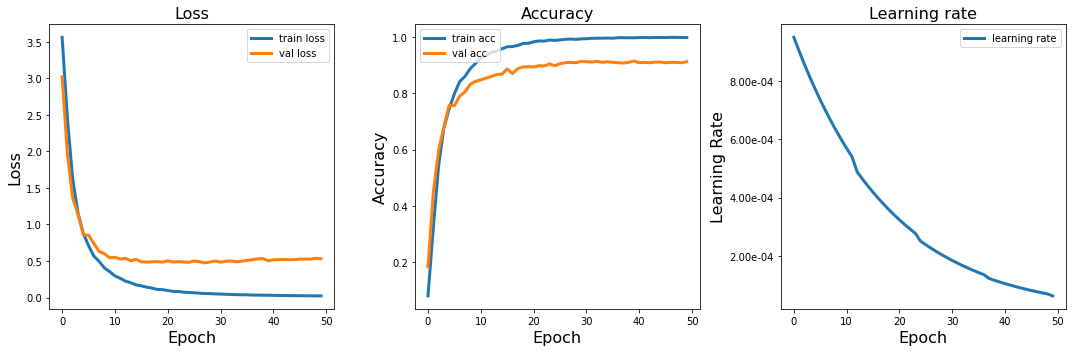

In [54]:
import argparse
import logging

import tensorflow as tf
from tensorflow.keras.optimizers import schedules
from utils import get_datasets, get_module_logger, display_metrics, \
    create_network, LrLogger


def exponential_decay(model, callbacks, lr=0.001):
    """ use exponential decay """
    # IMPLEMENT THIS FUNCTION
    initial_learning_rate = 0.001
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=100,  # here "step" is not "epoch", seems it is "batch"
        decay_rate=0.95,
        staircase=True
    )    
    
    # seems only needed for customized LearningRateScheduler
#     callbacks.append(tf.keras.callbacks.LearningRateScheduler(learning_rate))
        
    # compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    
    return model, callbacks


# # NOTE: this does not work, can not get the current global_step
# def step_decay(model, callbacks, lr=0.001):
#     """ create custom decay using learning rate scheduler """
#     #  IMPLEMENT THIS FUNCTION
#     global_step = tf.Variable(5, trainable=False, name="global_step")
#     boundaries = [3, 6]
#     values = [0.1, 0.05, 0.01]
#     learning_rate_fn = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
#         boundaries, values
#     )    
    
#     lr = learning_rate_fn(global_step)
# #     lr = learning_rate_fn(tf.compat.v1.train.get_or_create_global_step())
       
#     # seems only needed for customized LearningRateScheduler
# #     callbacks.append(tf.keras.callbacks.LearningRateScheduler(learning_rate))
        
#     # compile model
#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
#         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#         metrics=['accuracy']
#     )
    
#     return model, callbacks



def step_decay(model, callbacks, lr=0.001):
    """ create custom decay using learning rate scheduler """

    #  IMPLEMENT THIS FUNCTION
    def scheduler(epoch, lr):
        if epoch > 0 and epoch % 10 == 0:
            lr = lr * 0.5
        return lr 

    # needed for customized LearningRateScheduler
    callbacks.append(tf.keras.callbacks.LearningRateScheduler(scheduler))
            
    # compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    
    return model, callbacks



if __name__  == '__main__':
    logger = get_module_logger(__name__)

    #     parser = argparse.ArgumentParser(description='Download and process tf files')
#     parser.add_argument('-d', '--imdir', required=True, type=str,
#                         help='data directory')
#     parser.add_argument('-e', '--epochs', default=10, type=int,
#                         help='Number of epochs')
#     args = parser.parse_args()    

    epochs = 50
    imdir = 'GTSRB/Final_Training/Images'
    
    logger.info(f'Training for {epochs} epochs using {imdir} data')
    
    # get the datasets
    train_dataset, val_dataset = get_datasets(imdir)
    
    logger = LrLogger()
    callbacks = [logger]

    model = create_network()

    model, callbacks = exponential_decay(model, callbacks)
#     model, callbacks = step_decay(model, callbacks)

    history = model.fit(
        x=train_dataset, 
        epochs=epochs, 
        validation_data=val_dataset,
        callbacks=callbacks
    )
    
    display_metrics(history)